## Create a 2x2 percentile plot

In [1]:
import earthkit as ek

ds_en = ek.data.from_source("sample", "ens_storm_st_jude.grib") # ensemble forecast

In [2]:
# select windgust fields and convert them to Xarray
ds_fg = ds_en.sel(param="10fg3")
fg = ds_fg.to_xarray()

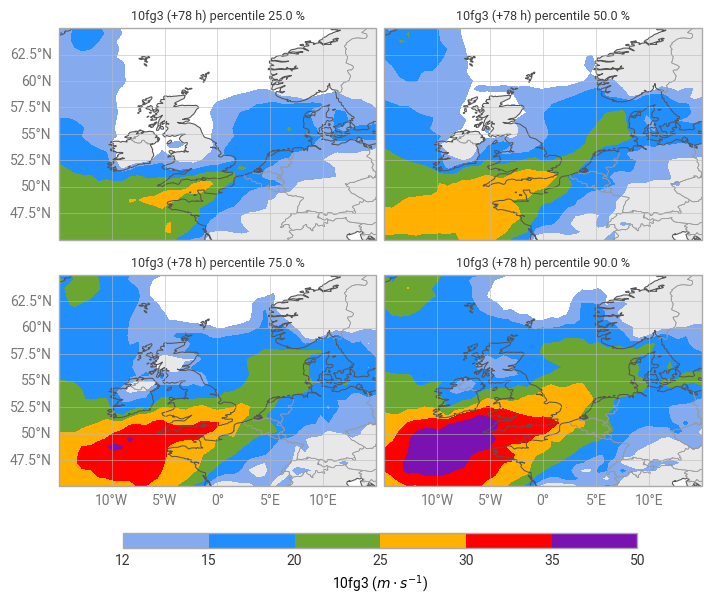

In [3]:
# define step
step = 78

percentiles = [0.25, 0.5, 0.75, 0.9]

# specified map index in figure for given percentile map
map_indices = [(0,0), (0,1), (1,0), (1,1)]

import cartopy.crs as ccrs
import datetime

figure = ek.plots.Figure(crs=ccrs.PlateCarree(), 
                               domain=[-15,15,65,45], size=(7, 6), rows=2, columns=2)

gust_style = ek.plots.styles.Style(
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
    levels=[12, 15, 20, 25, 30, 35, 50],
    units="m s-1",
)

for perc, map_idx, in zip(percentiles, map_indices):
    perc_xr = fg.quantile(perc, dim="number")

    subplot = figure.add_map(*map_idx)
    subplot.contourf(perc_xr.sel(step=datetime.timedelta(hours=step)), style=gust_style)
    subplot.title("{variable_name} (+" +str(step) + " h) percentile " + str(perc*100) + " %", 
            fontsize=9)


figure.land()
figure.coastlines()
figure.borders()
figure.gridlines()
figure.legend()

figure.show()